Projeto de Ciência de Dados e Inteligência Artificial - Análise sobre Jogos no Android em 2021

Integrantes: Antônio Manoel Gomes de Souza

Douglas da Silva Pereira Veras

Yan Borges Simões de Araújo

Introdução: Os jogos se tornaram nos últimos tempos um processo artístico que vai além do escopo do entretenimento, entender como funciona a escolha pessoal dos indivíduos em relação aos jogos permite abstrair qual é a tendência do mercado e para onde tende o futuro dos jogos eletrônicos, portanto, o objetivo da análise é reconhecer apartir das avaliações dos jogadores qual jogo se sobressai em relação aos outros, de forma a entender o porque da preferência dos utilizadores pelo jogo selecionado.

O Dataset utilizado agrupa os 100 jogos de cada categoria em relação ao Google Play Store datado do dia 9 de abril de 2021, utilizando diversos critérios de análise como o total de avaliações e instalações, por exemplo.

In [22]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

games = pd.read_csv("C:/Users/yan_b/Desktop/android-games.csv")
games

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False


Uma análise exploratória breve sobre os dados, para entender como se comporta a média e o desvio padrão, por exemplo

In [3]:
games.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.475723,1.101182e+06,4.313410,193.167341,3.969249,0.012965,7.883837e+05,1.216466e+05,5.954986e+04,2.796247e+04,1.036364e+05
std,28.941630,3.311738e+06,0.253545,4775.617650,18.912904,0.243492,2.483061e+06,2.955701e+05,1.447400e+05,7.676625e+04,3.589869e+05
min,1.000000,3.823800e+04,3.090000,0.000000,0.000000,0.000000,2.189800e+04,2.441000e+03,7.070000e+02,2.880000e+02,5.270000e+02
25%,25.000000,1.879988e+05,4.180000,0.100000,0.300000,0.000000,1.358290e+05,2.180200e+04,1.027775e+04,4.529500e+03,1.356075e+04
50%,51.000000,4.576750e+05,4.330000,0.500000,1.000000,0.000000,3.109435e+05,5.464350e+04,2.665850e+04,1.133050e+04,3.569400e+04
75%,75.750000,9.443342e+05,4.490000,1.600000,3.300000,0.000000,6.511310e+05,1.095648e+05,5.581750e+04,2.526650e+04,8.632625e+04
max,100.000000,8.067866e+07,4.910000,140394.400000,605.100000,7.490000,6.193571e+07,5.397273e+06,2.795172e+06,1.814999e+06,9.654037e+06


A limpeza e transformação dos dados passou por um processo simples de conversão de dados, inicialmente a coluna "installs" estava definida como uma string,
    ela foi utilizada como exemplo para a regressão linear, porém, para tal, teria que estar em ponto flutuante, então, a tática foi utilizar a função lambda para separar o "M" da string e depois recolocar na string como vazio, enquanto a string era convertida em float.

games["installs"] = games["installs"].apply(lambda x: float(x.split()[0].replace('M', '')))

PERGUNTAS

1- O crescimento do jogo tem relação com sua availiação?

Utilizando inicialmente um gráfico de dispersão para visualizar os dados

<AxesSubplot:xlabel='installs', ylabel='5 star ratings'>

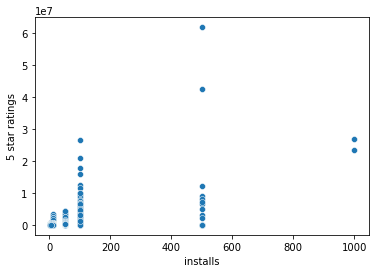

In [86]:
games_lin = games[["installs", "5 star ratings"]]
sns.scatterplot(data=games_lin, x="installs", y="5 star ratings")

Utiliando a regressão linear para entender a relação entre a avaliação cinco estrelas e a instalação dos jogos

In [89]:
result = linregress(games["installs"], games["5 star ratings"])
print(f"f(x)= {result.slope}x + {result.intercept}")

f(x)= 17583.16694114894x + 212296.1148027382


In [90]:
import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

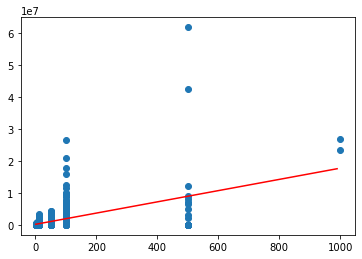

In [91]:
show_regression(games["installs"], games["5 star ratings"],  17583.16694114894,  212296.1148027382)

Isso indica que ao crescer o número de instalações, cresce também o número de avaliações cinco estrelas

In [92]:
def predict(installs):
    x = (17583.16694114894 * installs) + 212296.1148027382
    return x

Prevendo possíveis valores

In [104]:
print(f'{predict(500000.0 ):.2f}')
print(f'{predict(100000.0 ):.2f}')
print(f'{predict(300000.0 ):.2f}')
print(f'{predict(900000.0 ):.2f}')

8791795766.69
1758528990.23
5275162378.46
15825062543.15


2- Qual o jogo que mais teve um crescimento de público em 60 dias?

In [106]:
games_growth = games.groupby("title").mean()
games_growth.sort_values(by="growth (60 days)", ascending = False)

,rank,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
title,,,,,,,,,,,,,
My Town : Best Friends' House games for kids,76.0,57996.0,5.0,4.18,26.8,605.1,0.0,40743.0,4476.0,2753.0,2578.0,7444.0,False
Piano Fire - EDM Music & New Rhythm,77.0,53605.0,5.0,4.61,63.4,325.8,0.0,44877.0,3246.0,1772.0,934.0,2774.0,False
Quiz World: Play and Win Everyday!,66.0,67309.0,1.0,4.35,125.3,250.6,0.0,52621.0,3237.0,2092.0,1322.0,8034.0,False
My Town : Grandparents Play home Fun Life Game,97.0,49223.0,5.0,4.20,14.1,103.9,0.0,34402.0,4107.0,2829.0,1980.0,5902.0,False
Trivia Crack Adventure,73.0,60110.0,1.0,4.32,28.0,99.3,0.0,39556.0,10435.0,4274.0,1782.0,4060.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSR Racing,14.0,2489649.0,50.0,4.52,0.0,0.0,0.0,1948969.0,240394.0,105409.0,35133.0,159742.0,False
Logo Quiz,4.0,1183400.0,50.0,4.34,0.0,0.0,0.0,782381.0,200879.0,91546.0,35081.0,73511.0,False
Superbuzzer Trivia Quiz Game,77.0,58346.0,1.0,3.84,0.0,0.0,0.0,34640.0,6231.0,3315.0,2067.0,12092.0,False


3- Quais os jogos mais bem avaliados?

In [107]:
games_ratings = games.groupby("title").mean()
games_ratings.sort_values(by="5 star ratings", ascending = False)

,rank,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
title,,,,,,,,,,,,,
Garena Free Fire - The Cobra,1.0,80678661.0,500.0,4.33,2.9,7.9,0.0,61935712.0,4478738.0,2795172.0,1814999.0,9654037.0,False
Clash of Clans,1.0,55170976.0,500.0,4.49,0.3,0.6,0.0,42736445.0,5397273.0,2285363.0,978099.0,3773793.0,False
Subway Surfers,1.0,35305263.0,1000.0,4.44,0.5,1.1,0.0,26840330.0,3377645.0,1618461.0,801027.0,2667798.0,False
PUBG MOBILE: Graffiti Prank,2.0,35971961.0,100.0,4.24,2.0,3.1,0.0,26670566.0,2109631.0,1352610.0,893674.0,4945478.0,False
Candy Crush Saga,1.0,30859251.0,1000.0,4.56,0.7,1.6,0.0,23521533.0,4128497.0,1484852.0,457810.0,1266557.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quiz Planet,99.0,43189.0,1.0,4.00,2.3,5.3,0.0,22911.0,8960.0,4574.0,1851.0,4891.0,False
BeatEVO YG,81.0,50085.0,1.0,3.39,0.0,0.1,0.0,22571.0,4851.0,4981.0,4751.0,12928.0,False
Mini Piano,86.0,45012.0,5.0,3.53,0.0,0.0,0.0,22296.0,4339.0,4409.0,2816.0,11148.0,False


CONCLUSÃO: A análise dos dados permitiu entender algumas preferências dos jogadores no ano de 2021, constata-se que através da regressão linear foi possível
identificar uma relação entre as avaliações e as instalações, de modo que a medida em que o número de instalações cresce, o número de avaliações cinco estrelas também cresce.

Também foi possível verificar que o jogo "My Town: Best Friends'" foi o jogo que mais cresceu em público em dois meses, indicando que possivelmente houve um crescimento do público infantil no aplicativo da Play Store.

Por último, analisando qual o jogo mais bem avaliado, foi possível inferir que Free Fire domina o aplicativo com a maior avaliação cinco estrelas.

Após as análises, é importante evidenciar que para o mercado de jogos mobile, o entendimento sobre as perguntas feitas é de extrema importância para a tomada de decisão dos game designers, entender o público e as expectativas dos mesmos em relação aos gêneros dos jogos facilita uma inovação na criação de jogos, permitindo um novo olhar sobre o que é entretenimento. Porém, análises mais específicas podem ser feitas voltando-se para o perfil dos genêros, questionando-se quais gêneros são mais aceitos e melhores avaliados.  